# 1er paso: Crear conexión de datos con MySQL e Importar librerías

In [42]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()

Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025', 'Tourist_Accommodation17032025'].


C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\4084256081.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"
Se creó el dataframe "Tourist_Accommodation17032025"


In [43]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
# Definir la paleta institucional (colocarla en una celda anterior si es necesario)
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", 
    "#E8F1F2", "#A67C52", "#F4A261", "#264653", 
    "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
    "#2A9D8F", "#6D597A", "#B5838D"
]

# 2do paso: Exploración inicial

In [45]:
# se carga como df la TABLA MÁS RECIENTE
df = Tourist_Accommodation17032025
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


In [46]:
# Tamaño
df.shape

(18000, 35)

In [47]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 18000 non-null  int64  
 1   name                         17996 non-null  object 
 2   description                  17743 non-null  object 
 3   host_id                      18000 non-null  int64  
 4   neighbourhood_name           18000 non-null  object 
 5   neighbourhood_district       10941 non-null  object 
 6   room_type                    18000 non-null  object 
 7   accommodates                 18000 non-null  int64  
 8   bathrooms                    17866 non-null  object 
 9   bedrooms                     17872 non-null  object 
 10  beds                         17929 non-null  float64
 11  amenities_list               17968 non-null  object 
 12  price                        17552 non-null  float64
 13  minimum_nights  

# 3er paso: Corrección y limpieza del dataset

Imputaciones y conversiones

In [48]:
# Conversión a numérico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
# Características numéricas del alojamiento
# Se sustituyen los nulos por 1, bajo el entendido de que en todos los alojamientos por defecto hay 1 cama, 1 baño y aloja a al menos a 1 persona.
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

# Cambio de tipo de dato a integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)

# Conversión a booleano
df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
df['has_availability'] = df['has_availability'].astype(bool)
df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
df['is_instant_bookable'] = df['is_instant_bookable'].astype(bool)

# Conversión a fechas
df["first_review_date"] = pd.to_datetime(df["first_review_date"], errors="coerce")
df["last_review_date"] = pd.to_datetime(df["last_review_date"], errors="coerce")
df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")

# Imputaciones
# Columnas numéricas mejor con mediana ya que los outliers nos pueden afectar. 
df["minimum_nights"].fillna(df["minimum_nights"].median(), inplace=True)
df["maximum_nights"].fillna(df["maximum_nights"].median(), inplace=True)

# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

# Rellenar los Naan de review_score_location con la media
df["review_scores_location"].fillna(df["review_scores_location"].mean(), inplace=True)

# intentamos llenar los nulos de scores_rating con la media de (city, neighbourhood_name)
df['review_scores_rating'] = df.groupby(['city', 'neighbourhood_name'])['review_scores_rating'].transform(lambda x: x.fillna(x.mean()))
# como nos siguen quedando nulos en scores_rating vamos a tratar de rellenar los NaN con la media de la ciudad
df['review_scores_rating'] = df.groupby('city')['review_scores_rating'].transform(lambda x: x.fillna(x.mean()))

# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.
df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Desconocido")
)
# Columnas de texto
df["name"].fillna("Desconocido", inplace=True)
df["description"].fillna("No disponible", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")
df.isnull().sum()

C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\4099904585.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\4099904585.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\4099904585.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=Fa

apartment_id                       0
name                               0
description                        0
host_id                            0
neighbourhood_name                 0
neighbourhood_district             0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
amenities_list                     0
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
first_review_date              12426
last_review_date               12499
review_scores_rating               0
review_scores_accuracy          4861
review_scores_cleanliness       4850
review_scores_checkin           4873
r

Duplicados

In [49]:
df.duplicated().sum()

np.int64(8000)

In [50]:
registros_totales = len(df)
duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 18000
Total de duplicados exactos: 8000
El número de apartment_id duplicados es: 8350


In [51]:
# Filtar las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]
# Mostrar las filas duplicadas
duplicados_filas.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,Desconocido,Private room,2,2,1,2,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,True,7,20,40,130,78,2010-02-01,2017-05-09,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,True,0,0,0,162,33,2014-10-10,NaT,920.0,90.0,90.0,100.0,100.0,80.0,90.0,False,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,4,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,True,26,31,31,270,148,2011-05-01,NaT,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,2,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,True,9,23,49,300,292,NaT,2020-04-01,940.0,100.0,90.0,100.0,100.0,100.0,90.0,True,306.0,spain,barcelona,2020-01-10
9,73683,Sagrada Familia area for 12 people,"An ideal location for a big group, two apartme...",135703,el Camp d'en Grassot i Gr�cia Nova,Gr�cia,Entire home/apt,12,2,4,12,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",3000.0,2,60,True,8,12,23,296,120,2011-04-06,NaT,920.0,90.0,90.0,100.0,100.0,90.0,90.0,True,14.0,spain,barcelona,2018-06-09


In [52]:
# Se decide borrar solo los duplicados exactos y mantener los parciales (que son duplicados de la columna apartment_id) para que cada perfil decida cómo los tratará en su análisis.
df = df.drop_duplicates()
df.shape

(10000, 35)

In [53]:
def imputación_desde_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo y completa sus valores faltantes 
    con los del más reciente SIN eliminar registros.
    Devuelve el df con valores actualizados y un resumen de los cambios.
    """

    df = df.copy()  # no modifica el df original
    resumen = []

    # filtra solo duplicadas por id_col
    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena (más antiguo primero)
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores faltantes en el registro antiguo
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si hubo cambios, se guarda en el resumen
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro reciente": latest_index,
                    "columnas actualizadas": actualizacion
                })

    # convierte el resumen en df
    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df, resumen_cambios = imputación_desde_duplicados(df, id_col='apartment_id', date_col='insert_date')

In [54]:
df.duplicated().sum()

registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 10000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 350


Decidimos trabajar con N = 10.000 debido a que cuantos mas datos (observaciones) tengamos mejor para responder la pregunta de negocio. No observamos una incompatibilidad al dejar mas de una observación de la misma propiedad. 

In [55]:
df.to_csv("S3_EDA_Marketing_def.csv", index=False)

TABLAS DE FRECUENCIA

In [56]:
# Tablas de frecuencia para las categorías seleccionadas
categorical_columns = ['city', 'neighbourhood_name', 'review_scores_location', 
                       'review_scores_rating', 'minimum_nights', 'maximum_nights']

# Generar y mostrar tablas de frecuencia para cada categoría
for col in categorical_columns:
    frequency_table = df[col].value_counts().reset_index()
    frequency_table.columns = [col, 'count']
    
    # Mostrar la tabla de frecuencia
    print(f"\nFrecuencia de {col}:")
    print(frequency_table.head(10))  # Muestra las 10 categorías más frecuentes



Frecuencia de city:
        city  count
0  barcelona   2825
1     madrid   2202
2   mallorca   1644
3     girona   1533
4   valencia    528
5    sevilla    524
6     malaga    520
7    menorca    224

Frecuencia de neighbourhood_name:
                      neighbourhood_name  count
0                                 Centro    336
1                 la Dreta de l'Eixample    312
2                            Embajadores    286
3                      Palma de Mallorca    212
4                               el Raval    212
5                            Universidad    207
6                               Pollen�a    198
7  Sant Pere, Santa Caterina i la Ribera    188
8                                Alc�dia    178
9                                Palacio    175

Frecuencia de review_scores_location:
   review_scores_location  count
0              100.000000   4775
1               95.511121   2724
2               90.000000   1919
3               80.000000    461
4               70.000000     62

-Análisis de review_scores_location<br>
1 Valores muy concentrados en puntuaciones altas: El 85% de los datos están en 100, 95.5 y 90. Esto sugiere que la mayoría de los alojamientos tienen ubicaciones muy bien valoradas, lo cual podría ser una distorsión en la percepción o falta de variabilidad en las reseñas.<br>
2 Falta de una distribución normal: En un sistema de puntuación más realista, esperaríamos una distribución más balanceada. Aquí parece que la mayoría de los usuarios dan calificaciones altas, mientras que hay muy pocas propiedades con puntuaciones de 70 o menos.<br>
3 Valores intermedios casi inexistentes. Prácticamente no hay puntuaciones entre 80 y 70. Esto sugiere que los usuarios tienden a calificar en extremos: muy bien (100-90) o muy mal (70-60).<br>

-Análisis de City:<br>
1 Barcelona es la ciudad con más registros (2825), seguida de Madrid (2202).Representan la mayor parte del dataset, lo que puede influir en los análisis si no se balancea la cantidad de datos por ciudad.Esto puede indicar que estas ciudades tienen más oferta de alojamientos o más datos disponibles en la plataforma.<br>
2 Ciudades con menos registros: Menorca (224) y Málaga (520).

-Análisis de los barrios (neighbourhood_name)<br>
1 Los barrios más frecuentes tienen muchas más propiedades listadas. Ejemplo: Centro, la Dreta de l’Eixample, Embajadores, el Raval tienen una alta concentración de alojamientos. Esto podría indicar zonas turísticas con mayor oferta o mayor demanda de alquileres.<br>
2 Algunos barrios solo tienen 1 alojamiento listado. Ejemplo: Terrades, Osor, La Buhaira, MASSARROJOS. Podrían ser zonas residenciales con poca oferta turística.<br>
3 Distribución desigual de barrios: Hay barrios con cientos de alojamientos y otros con muy pocos.<br>

-Análisis de review_scores_rating<br>
1 La puntuación más común es 1000.0: Esto indica que muchos alojamientos tienen la máxima puntuación posible. Puede reflejar alta satisfacción o un sesgo en las calificaciones, donde los huéspedes solo dejan reseñas si están muy satisfechos.<br>
2 Existen puntuaciones muy poco comunes: Valores como 932.72, 921.53, 848.18 aparecen solo una vez en todo el dataset.<br>
3 Algunos alojamientos tienen puntuaciones extremadamente bajas: El mínimo es 200, lo que indica propiedades con experiencias muy negativas.<br>

-Análisis de minimum_nights (Noches mínimas permitidas)<br>
1 El valor más común es 1 noche: Más de 3000 alojamientos permiten reservas de una sola noche. Esto sugiere que la mayoría de los alojamientos no imponen restricciones de estancia mínima.<br>
2 Hay algunos valores extremadamente altos (1125 noches). Algunos alojamientos requieren una estancia mínima de varios meses o años.<br>

-Análisis de maximum_nights (Noches máximas permitidas)<br>
1 El valor más frecuente es 1125 noches: Parece ser un valor predeterminado en la plataforma, ya que casi todos los alojamientos tienen este número. Probablemente los anfitriones no establecen un máximo y la plataforma asigna un número alto por defecto.<br>
2 Valores intermedios de 365, 30 y 60 noches también son frecuentes: 365 noches sugiere que algunos alojamientos permiten estancias largas (hasta un año). 30 y 60 noches pueden representar opciones populares para alquileres de medio plazo.<br>
3 Existen valores extremadamente bajos e inusuales. Hay registros con máximo de 7 noches, lo que indica que algunos alojamientos solo aceptan reservas cortas.<br>


OUTLIERS DE MÁXIMAS Y MÍNIMAS RESERVAS POR NOCHE

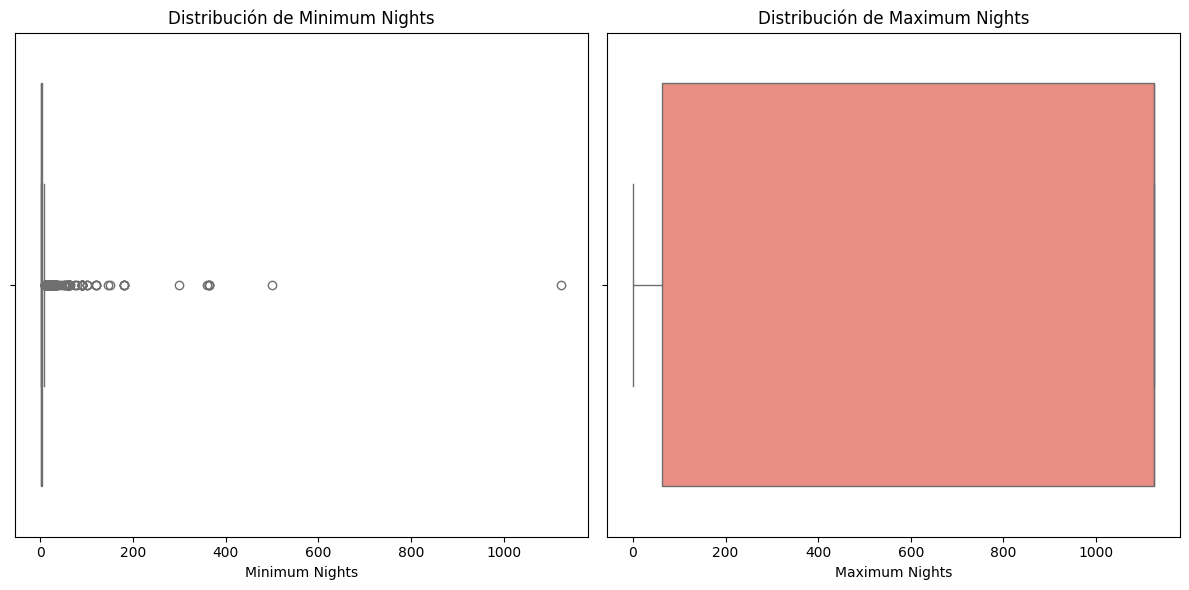

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear dos subgráficos (boxplots) para visualizar los outliers en 'minimum_nights' y 'maximum_nights'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['minimum_nights'], color='skyblue')
plt.title("Distribución de Minimum Nights")
plt.xlabel("Minimum Nights")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['maximum_nights'], color='salmon')
plt.title("Distribución de Maximum Nights")
plt.xlabel("Maximum Nights")

# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Observaciones clave:<br>

1️⃣ minimum_nights tiene una gran cantidad de outliers. La mayoría de los valores se concentran en la parte baja del eje X (cercanos a 1-10 noches). Sin embargo, hay muchos valores extremos dispersos, incluyendo algunos por encima de 600 y hasta 1000 noches.<br>
Esto confirma que algunos anfitriones establecen valores muy altos, posiblemente por error o sin intención de aceptar reservas cortas.<br>

2️⃣ maximum_nights está dominado por un valor extremo. En la caja del boxplot de maximum_nights, se observa que todo el gráfico está ocupado por un valor enorme, lo que indica que la mayoría de los alojamientos tienen un número de noches máximo extremadamente alto o ilimitado. El hecho de que el boxplot esté completamente expandido sugiere que no hay un límite realista en muchos casos.<br>

3️⃣ Posible sesgo en los datos La presencia de valores tan altos y extremos en minimum_nights puede distorsionar el análisis si no se filtran correctamente.Los alquileres de más de 31 días son considerados como alquiler de larga duración y no alquiler turístico.<br>

In [58]:
percentiles = df["minimum_nights"].quantile([0.90, 0.95, 0.99, 1])
print("Percentiles de minimum_nights:")
print(percentiles)

Percentiles de minimum_nights:
0.90       7.0
0.95      30.0
0.99      32.0
1.00    1125.0
Name: minimum_nights, dtype: float64


Solo el 5% de los datos tienen valores mayores a 30 noches. Estos alojamientos suelen estar destinados a alquileres de largo plazo y distorsionan el análisis de optimización para estancias turísticas. Según la Ley de Arrendamientos Urbanos - LAU en España,los contratos inferiores a 31 días son considerados Estancias Turísticas. Para ello se necesisa una liciencia turística y tienen una actividad económica y financiera diferente que los alquileres de larga duración. Decidimos trabajar con estancias turísticas solamente.

In [59]:
df.duplicated().sum()

registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 10000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 350


Decidimos trabajar con N = 10.000 debido a que cuantos mas datos (observaciones) tengamos mejor para responder la pregunta de negocio. No observamos una incompatibilidad al dejar mas de una observación de la misma propiedad. 

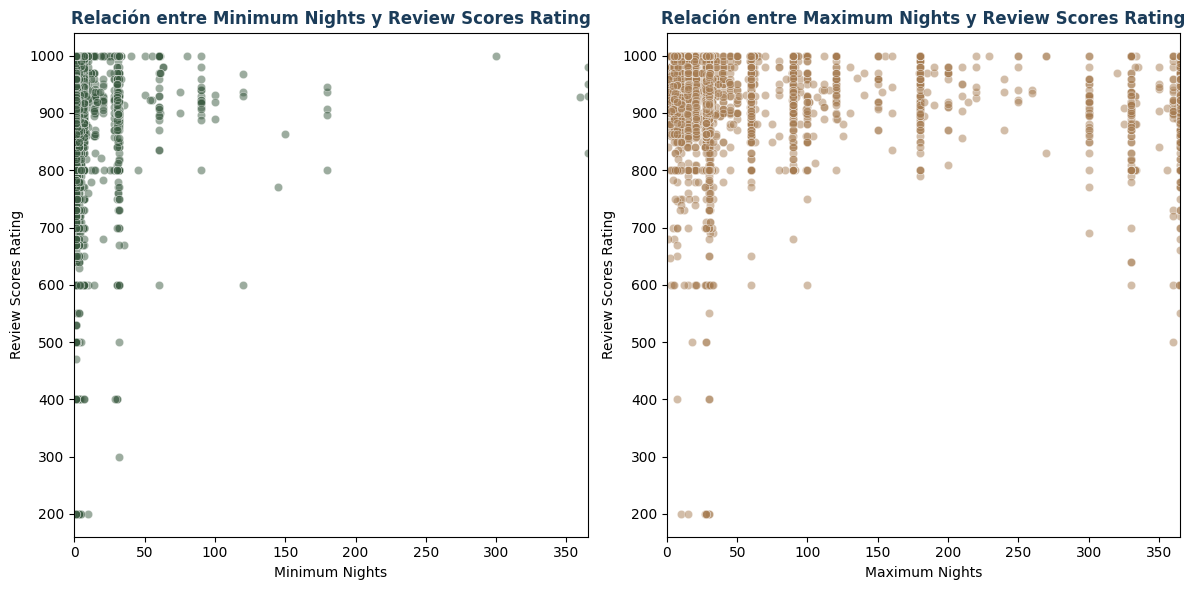

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Gráfico de dispersión para 'minimum_nights' vs 'review_scores_rating'
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['minimum_nights'], y=df['review_scores_rating'], alpha=0.5, color=paleta[1])
plt.xlim(0, 365)  # Limitar el eje x a un año para evitar valores extremos
plt.title("Relación entre Minimum Nights y Review Scores Rating", fontsize=12, fontweight="bold", color=paleta[0])
plt.xlabel("Minimum Nights", fontsize=10, color="black")
plt.ylabel("Review Scores Rating", fontsize=10, color="black")

# Gráfico de dispersión para 'maximum_nights' vs 'review_scores_rating'
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['maximum_nights'], y=df['review_scores_rating'], alpha=0.5, color=paleta[5])
plt.xlim(0, 365)  # Limitar el eje x a un año
plt.title("Relación entre Maximum Nights y Review Scores Rating", fontsize=12, fontweight="bold", color=paleta[0])
plt.xlabel("Maximum Nights", fontsize=10, color="black")
plt.ylabel("Review Scores Rating", fontsize=10, color="black")

# Ajustar diseño
plt.tight_layout()

# Mostrar gráficos
plt.show()

# Calcular la correlación entre noches mínimas/máximas y review_scores_rating
correlation_minimum = df[['minimum_nights', 'review_scores_rating']].corr().iloc[0,1]
correlation_maximum = df[['maximum_nights', 'review_scores_rating']].corr().iloc[0,1]

# Crear un DataFrame con los resultados de correlación
correlation_results = pd.DataFrame({
    "Variable": ["Minimum Nights", "Maximum Nights"],
    "Correlación con Review Scores Rating": [correlation_minimum, correlation_maximum]
})



Observaciones clave del gráfico de dispersión:
1️⃣ No hay una relación clara entre minimum_nights y review_scores_rating. Los datos están dispersos, sin una tendencia clara.
Incluso con noches mínimas altas, algunos alojamientos tienen buenas calificaciones.
Esto sugiere que minimum_nights no es un factor determinante en la puntuación de los alojamientos.
2️⃣ maximum_nights tampoco muestra una relación evidente con review_scores_rating. Muchos valores altos de maximum_nights parecen configuraciones arbitrarias.
No se observa un patrón en que más noches máximas signifiquen mejores o peores calificaciones.

In [86]:
from scipy.stats import spearmanr, kendalltau
import pandas as pd

# Filtrar para evitar valores extremos que puedan distorsionar la correlación
df_filtered = df[(df['minimum_nights'] <= 365)]

# Calcular correlación de Spearman
spearman_corr, spearman_p = spearmanr(df_filtered['minimum_nights'], df_filtered['review_scores_rating'])

# Calcular correlación de Kendall
kendall_corr, kendall_p = kendalltau(df_filtered['minimum_nights'], df_filtered['review_scores_rating'])

# Crear un DataFrame con los resultados
correlation_results = pd.DataFrame({
    "Método": ["Spearman", "Kendall"],
    "Correlación": [spearman_corr, kendall_corr],
    "P-valor": [spearman_p, kendall_p]
})

# Mostrar la tabla con los resultados de correlación
print("Correlación entre Minimum Nights y Review Scores Rating:")
print(correlation_results)


Correlación entre Minimum Nights y Review Scores Rating:
     Método  Correlación       P-valor
0  Spearman     0.064714  9.375401e-11
1   Kendall     0.048466  6.714296e-11


La correlación es baja (~0.06 para Spearman y ~0.05 para Kendall), lo que indica que minimum_nights tiene muy poca influencia en review_scores_rating.
El p-valor es muy bajo, lo que sugiere que el resultado es estadísticamente significativo, pero la magnitud de la relación sigue siendo débil.

In [62]:
from scipy.stats import spearmanr, kendalltau
import pandas as pd

# Filtrar valores extremos para evitar distorsión en los cálculos
df_filtered = df[(df['minimum_nights'] <= 365) & (df['maximum_nights'] <= 365)]

# Definir pares de variables a analizar
correlation_pairs = [
    ("minimum_nights", "maximum_nights"),
    ("minimum_nights", "number_of_reviews"),
    ("maximum_nights", "review_scores_location"),
    ("minimum_nights", "price"),
    ("maximum_nights", "price")
]

# Calcular correlaciones
correlation_results = []
for var1, var2 in correlation_pairs:
    spearman_corr, spearman_p = spearmanr(df_filtered[var1], df_filtered[var2])
    kendall_corr, kendall_p = kendalltau(df_filtered[var1], df_filtered[var2])
    
    correlation_results.append({
        "Variable 1": var1,
        "Variable 2": var2,
        "Spearman Correlación": spearman_corr,
        "Spearman P-valor": spearman_p,
        "Kendall Correlación": kendall_corr,
        "Kendall P-valor": kendall_p
    })

# Convertir los resultados en un DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Mostrar la tabla con los resultados de correlación
print("Correlaciones entre mínimo/máximo de noches y otras variables:")
print(correlation_df)


Correlaciones entre mínimo/máximo de noches y otras variables:
       Variable 1              Variable 2  Spearman Correlación  \
0  minimum_nights          maximum_nights              0.328690   
1  minimum_nights       number_of_reviews             -0.132353   
2  maximum_nights  review_scores_location             -0.016056   
3  minimum_nights                   price              0.120648   
4  maximum_nights                   price              0.169503   

   Spearman P-valor  Kendall Correlación  Kendall P-valor  
0      6.155200e-88             0.251313     5.946004e-88  
1      5.464407e-15            -0.102304     7.486732e-16  
2      3.451531e-01            -0.012570     3.472364e-01  
3      1.085822e-12             0.092271     9.790457e-14  
4      1.036293e-23             0.117812     9.358900e-24  


Análisis de las correlaciones entre minimum_nights, maximum_nights y otras variables

1️⃣ Correlación entre minimum_nights y maximum_nights (0.328 - Spearman, 0.251 - Kendall). Hay una correlación positiva moderada, lo que indica que cuando los anfitriones establecen un mínimo de noches alto, también suelen establecer un máximo alto.
Sin embargo, la correlación no es muy fuerte, lo que sugiere que en muchos casos, las restricciones de estancia pueden no estar directamente relacionadas.

2️⃣ minimum_nights y number_of_reviews (-0.132 - Spearman, -0.102 - Kendall). Existe una correlación negativa débil pero significativa, lo que indica que los alojamientos con una estancia mínima más alta tienden a recibir menos reseñas.
Esto tiene sentido: si el mínimo de noches es alto, menos personas pueden reservar el alojamiento, lo que reduce la cantidad de reseñas disponibles.

3️⃣ maximum_nights y review_scores_location (-0.016 - Spearman, -0.012 - Kendall). No hay una correlación significativa entre el número máximo de noches y la puntuación de ubicación. Esto confirma que el máximo de noches no afecta la percepción de la ubicación.

4️⃣ minimum_nights y price (0.120 - Spearman, 0.092 - Kendall). Existe una correlación positiva débil, lo que indica que los alojamientos con una estancia mínima más alta tienden a tener precios más elevados. Es posible que los anfitriones con propiedades más exclusivas o caras quieran evitar reservas cortas y prefieran clientes que se queden más tiempo.

5️⃣ maximum_nights y price (0.169 - Spearman, 0.118 - Kendall). La correlación es más alta que con minimum_nights, pero sigue siendo baja.
Esto puede indicar que algunos alojamientos con precios más altos permiten estancias más largas, pero la relación no es muy fuerte.

In [63]:
df.shape

(10000, 35)

# 4to paso: Pregunta de Negocio a Departamento de Marketing

### ¿Qué ciudades y barrios muestran un potencial de optimización más grande considerando el número de reseñas, la puntuación de la zona y la disponibilidad mínima y máxima de noches*?

* (*)Tras un análisis exhaustivo del dataset, se llega a la conclusión de que el máximo y mínimo de noches no siempre reflejan una estrategia real. 
Estas variables no son un factor de mejora sino una restricción establecida por el anfitrión según su modelo de negocio, capacidad operativa o preferencia.
No es un factor que pueda modificarse globalmente para aumentar la calidad o competitividad del barrio, ya que depende de cada propietario.
La optimización de una ciudad o barrio debería centrarse en variables más significativas como review_scores_location y review_scores_rating que sí afectan directamente la percepción del alojamiento.


In [64]:
#Crea una nueva columna llamada mean_review_score_by_city_neighbourhood.En esta columna, coloca la media de review_scores_rating para cada combinación de city y neighbourhood_name.
# Esto te permite comparar cada apartamento con la media de su barrio.
df['mean_review_score_by_city_neighbourhood'] = df.groupby(['city', 'neighbourhood_name'])['review_scores_rating'].transform('mean') 

In [65]:
# Añadir una columna que indique si el apartamento esta infravalorado respecto al resto de apartamentos del barrio-ciudad
# Marca con 1 los apartamentos que están por debajo de la media del barrio.
df['apartamento_mejorable'] = (df['review_scores_rating'] < df['mean_review_score_by_city_neighbourhood']).astype(int)

In [66]:
# Crear una tabla que sume 'apartamento_mejorable' agrupando por 'city' y 'neighbourhood_name'
valores_por_debajo_de_la_media = df.groupby(['city', 'neighbourhood_name'])['apartamento_mejorable'].sum().reset_index()

# Ordenar la tabla de mayor a menor según la suma de 'apartamento_mejorable'
valores_por_debajo_de_la_media = valores_por_debajo_de_la_media.sort_values(by='apartamento_mejorable', ascending=False)

# Mostrar la tabla
print(valores_por_debajo_de_la_media)

# Ahora sabemos dónde hay más alojamientos con baja puntuación relativa.

          city neighbourhood_name  apartamento_mejorable
251     madrid        Embajadores                    134
327     malaga             Centro                    119
336   mallorca            Alc�dia                    114
367   mallorca  Palma de Mallorca                    108
161     girona              Roses                    102
..         ...                ...                    ...
516   valencia           SANT PAU                      0
515   valencia     SANT MARCEL.LI                      0
1    barcelona        Can Peguera                      0
521   valencia           TRINITAT                      0
522   valencia      VARA DE QUART                      0

[523 rows x 3 columns]


In [67]:
# Crear una tabla ordenando 'city' y 'neighbourhood_name' por 'review_scores_location' de menor a mayor
location_score_sorted = df.groupby(['city', 'neighbourhood_name'])['review_scores_location'].mean().reset_index()

# Ordenar la tabla de menor a mayor según 'review_scores_location'
location_score_sorted = location_score_sorted.sort_values(by='review_scores_location', ascending=True)

# Mostrar la tabla
print(location_score_sorted)
#Ordena los barrios con peor valoración de ubicación.

          city neighbourhood_name  review_scores_location
205     girona          Vilaju�ga                    60.0
418    sevilla      La Bachillera                    70.0
138     girona               Osor                    70.0
430    sevilla            Palmete                    80.0
422    sevilla           La Oliva                    80.0
..         ...                ...                     ...
82      girona            Bordils                   100.0
73      girona               Amer                   100.0
515   valencia     SANT MARCEL.LI                   100.0
516   valencia           SANT PAU                   100.0
1    barcelona        Can Peguera                   100.0

[523 rows x 3 columns]


In [78]:
# Unificar las tablas location_score_sorted y valores_por_debajo_de_la_media cruzando por 'city' y 'neighbourhood_name'
merged_table = location_score_sorted.merge(valores_por_debajo_de_la_media, on=['city', 'neighbourhood_name'], how='inner')

# Mostrar la tabla unificada
print(merged_table.head(25))

#  Ahora disponemos de una tabla final con: review_scores_location (qué tan bien valorada es la ubicación) y apartamento_mejorable (cuántos apartamentos tienen baja valoración en el barrio).


         city           neighbourhood_name  review_scores_location  \
0      girona                    Vilaju�ga               60.000000   
1     sevilla                La Bachillera               70.000000   
2      girona                         Osor               70.000000   
3     sevilla                      Palmete               80.000000   
4     sevilla                     La Oliva               80.000000   
5     sevilla    Prado, Parque Mar�a Luisa               80.000000   
6     sevilla  La Palmilla, Doctor Mara��n               80.000000   
7    valencia                   EL CALVARI               80.000000   
8      girona                          Ger               80.000000   
9     sevilla                      Tablada               80.000000   
10     girona                 Sant Ferriol               80.000000   
11    sevilla        Cruz Roja, Capuchinos               80.000000   
12  barcelona                     Vallbona               80.000000   
13     girona       

Apartamentos Mejorables En Zonas Con Baja Puntuación

In [69]:
# Filtrar los barrios donde la puntuación de ubicación está por debajo de la media
mean_location_score = merged_table['review_scores_location'].mean()

# Filtrar los barrios donde el número de apartamentos mejorables está por encima de la media
mean_apartamentos_mejorables = merged_table['apartamento_mejorable'].mean()

# Seleccionar solo los barrios que cumplen ambas condiciones
df_critico = merged_table[
    (merged_table['review_scores_location'] < mean_location_score) &
    (merged_table['apartamento_mejorable'] > mean_apartamentos_mejorables)
]

# Mostrar la tabla con los barrios críticos
print(df_critico)


          city                 neighbourhood_name  review_scores_location  \
18   barcelona              el Bes�s i el Maresme               84.437278   
29   barcelona                          el Carmel               86.239154   
38      madrid                          San Diego               87.904274   
101     malaga                Cruz De Humilladero               90.241976   
105     madrid                            Aguilas               90.340748   
111     malaga                 Carretera de Cadiz               91.106839   
113  barcelona               el Putxet i el Farr�               91.368171   
114  barcelona  el Parc i la Llacuna del Poblenou               91.370372   
123  barcelona         la Maternitat i Sant Ramon               91.711830   
136   mallorca                          Llucmajor               92.574078   
161  barcelona                        el Guinard�               93.140742   
164  barcelona           Sant Mart� de Proven�als               93.265360   

review_scores_location → Puntuación media de ubicación (los valores bajos indican peores ubicaciones).<br>
apartamento_mejorable → Cantidad de alojamientos con puntuaciones bajas en relación con su barrio.<br>
ranking_location → Posición en el ranking de peor ubicación (menor valor = peor ubicación).<br>
ranking_mejorable → Posición en el ranking de más apartamentos mejorables (mayor valor = más apartamentos problemáticos).<br>

TEST DE CORRELACIÓN ENTRE review_scores_location  Y apartamento_mejorable

In [70]:
# Calcular la correlación de Spearman
spearman_corr = merged_table[['review_scores_location', 'apartamento_mejorable']].corr(method='spearman')

# Calcular la correlación de Kendall
kendall_corr = merged_table[['review_scores_location', 'apartamento_mejorable']].corr(method='kendall')

# Mostrar ambas correlaciones
print("Correlación de Spearman:\n", spearman_corr)
print("\nCorrelación de Kendall:\n", kendall_corr)


Correlación de Spearman:
                         review_scores_location  apartamento_mejorable
review_scores_location                1.000000               0.044817
apartamento_mejorable                 0.044817               1.000000

Correlación de Kendall:
                         review_scores_location  apartamento_mejorable
review_scores_location                1.000000               0.043686
apartamento_mejorable                 0.043686               1.000000


📌 Interpretación de los resultados
🔹 Valores cercanos a 0 indican que no hay una relación clara entre las variables.
🔹 El coeficiente es positivo, pero extremadamente bajo, lo que significa que aunque haya una ligera tendencia, es prácticamente despreciable.
🔹 Conclusión: Un barrio con mala ubicación no implica que tenga más apartamentos problemáticos, y viceversa.

REALIZAMOS TEST DE CORRELACIÓN POR CADA CIUDAD


In [71]:
import scipy.stats as stats
import pandas as pd

# Lista para almacenar los resultados
correlation_results = []

# Iterar sobre cada ciudad y calcular la correlación junto con el p-valor
for city in merged_table['city'].unique():
    city_data = merged_table[merged_table['city'] == city]
    
    # Correlación de Spearman
    spearman_corr, spearman_p = stats.spearmanr(city_data['review_scores_location'], city_data['apartamento_mejorable'])
    
    # Correlación de Kendall
    kendall_corr, kendall_p = stats.kendalltau(city_data['review_scores_location'], city_data['apartamento_mejorable'])
    
    # Almacenar resultados en la lista
    correlation_results.append([city, spearman_corr, spearman_p, kendall_corr, kendall_p])

# Convertir los resultados en un DataFrame
df_correlation_by_city = pd.DataFrame(
    correlation_results, 
    columns=['city', 'Spearman_corr', 'Spearman_p_value', 'Kendall_corr', 'Kendall_p_value']
)

# Mostrar la tabla de correlaciones por ciudad
print(df_correlation_by_city)


        city  Spearman_corr  Spearman_p_value  Kendall_corr  Kendall_p_value
0     girona      -0.226262          0.007399     -0.170735         0.011432
1    sevilla       0.396949          0.001538      0.346950         0.000407
2   valencia       0.247665          0.043313      0.195832         0.029476
3  barcelona       0.377685          0.001267      0.287907         0.000595
4     madrid       0.227636          0.013990      0.159613         0.015562
5     malaga       0.310981          0.381787      0.295531         0.241129
6   mallorca      -0.233126          0.096266     -0.155402         0.112925
7    menorca       0.000000          1.000000     -0.036370         0.900780


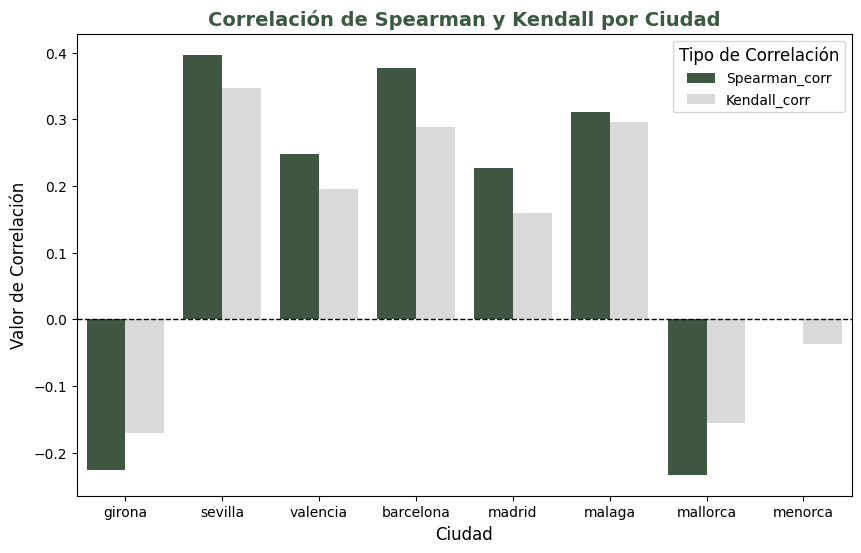

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame con los datos de correlación por ciudad
df_corr = pd.DataFrame({
    'city': ['girona', 'sevilla', 'valencia', 'barcelona', 'madrid', 'malaga', 'mallorca', 'menorca'],
    'Spearman_corr': [-0.226262, 0.396949, 0.247665, 0.377685, 0.227636, 0.310981, -0.233126, 0.000000],
    'Kendall_corr': [-0.170735, 0.346950, 0.195832, 0.287907, 0.159613, 0.295531, -0.155402, -0.036370]
})

# Definir la paleta corporativa con colores más oscuros pero equilibrados
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", 
    "#E8F1F2", "#A67C52", "#F4A261", "#264653", 
    "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
    "#2A9D8F", "#6D597A", "#B5838D"
]

# Seleccionar colores más oscuros pero equilibrados de la paleta
colores_moderados = [paleta[1], paleta[3]]

# Configurar el gráfico con la paleta de colores moderadamente oscura
plt.figure(figsize=(10, 6))
sns.barplot(data=df_corr.melt(id_vars=['city'], var_name='Tipo de Correlación', value_name='Valor'),
            x='city', y='Valor', hue='Tipo de Correlación', palette=colores_moderados)  # Usar colores más oscuros

# Configurar etiquetas y título con la paleta corporativa
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Línea en el 0 para referencia
plt.title("Correlación de Spearman y Kendall por Ciudad", fontsize=14, fontweight="bold", color=paleta[1])
plt.xlabel("Ciudad", fontsize=12, color="black")
plt.ylabel("Valor de Correlación", fontsize=12, color="black")
plt.xticks(rotation=0, color="black")  # No rotar nombres de ciudades para mejor legibilidad
plt.legend(title="Tipo de Correlación", title_fontsize=12, fontsize=10)

# Mostrar el gráfico
plt.show()


1️⃣ Sevilla y Barcelona tienen la correlación más alta y positiva<br>
En estas ciudades, los barrios con peor ubicación tienden a tener más apartamentos con baja valoración relativa o dicho de otro modo más problemáticos.<br>
La relación es estadísticamente significativa, lo que indica que es un patrón real.<br>
Sevilla (0.39 Spearman, 0.34 Kendall, p < 0.01)<br>
Barcelona (0.37 Spearman, 0.28 Kendall, p < 0.01)<br>

2️⃣ Girona y Mallorca tienen correlaciones negativas<br>
Girona (-0.22 Spearman, -0.17 Kendall, p < 0.01)<br>
En estos casos, los barrios con peor ubicación tienden a tener menos apartamentos problemáticos.<br>
Esto puede indicar que en estas ciudades, otros factores son más relevantes que la ubicación para la valoración de los apartamentos.<br>

3️⃣ Menorca prácticamente no muestra relación<br>
La correlación es cercana a cero, lo que significa que la ubicación no influye en la calidad percibida de los apartamentos.<br>

4️⃣ Madrid, Valencia tienen correlaciones positivas pero más débiles<br>
Madrid y Valencia (0.22-0.24 Spearman, p < 0.05)<br>
Esto sugiere que en estas ciudades, la relación entre ubicación y calidad del alojamiento existe, pero es menos fuerte.Aunque la relación es menor, sigue habiendo una ligera tendencia a que en estas ciudades los barrios peor ubicados tengan más apartamentos problemáticos.<br>

5 🔹 Ciudades con correlación NO significativa<br>
🔸 Málaga (p = 0.38) y Mallorca (p = 0.09)<br>
Las correlaciones no son significativas, por lo que no podemos concluir que exista una relación real entre ubicación y calidad del alojamiento en estas ciudades.<br>
🔸 Menorca (p = 1.0 y p = 0.90)<br>
No hay ninguna correlación.<br>

📌 Conclusión<br>
✅ Sevilla y Barcelona son las ciudades donde claramente los barrios con mala ubicación tienen más apartamentos con problemas.<br>
✅ Girona tiene una relación inversa: los barrios peor ubicados NO tienen tantos apartamentos problemáticos.<br>
✅ Madrid y Valencia tienen relaciones más débiles pero siguen la misma tendencia que Sevilla y Barcelona.<br>
✅ En Málaga, Mallorca y Menorca, NO parece haber una relación entre ubicación y valoración del alojamiento.<br>

Gráfico de barras: Barrios con peor ubicación y más apartamentos mejorables<br>
Este gráfico nos ayuda a comparar visualmente qué barrios tienen las peores ubicaciones y más apartamentos con baja valoración.<br>
Permite ver los 20 barrios con peor ubicación y su ciudad correspondiente.<br>

C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\14079887.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(5, "avg_review_scores_location"))  # Cambiado a 5 barrios
C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\14079887.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(5, "avg_review_scores_rating"))  # Cambiado a 5 barrios
C:\Users\sguti

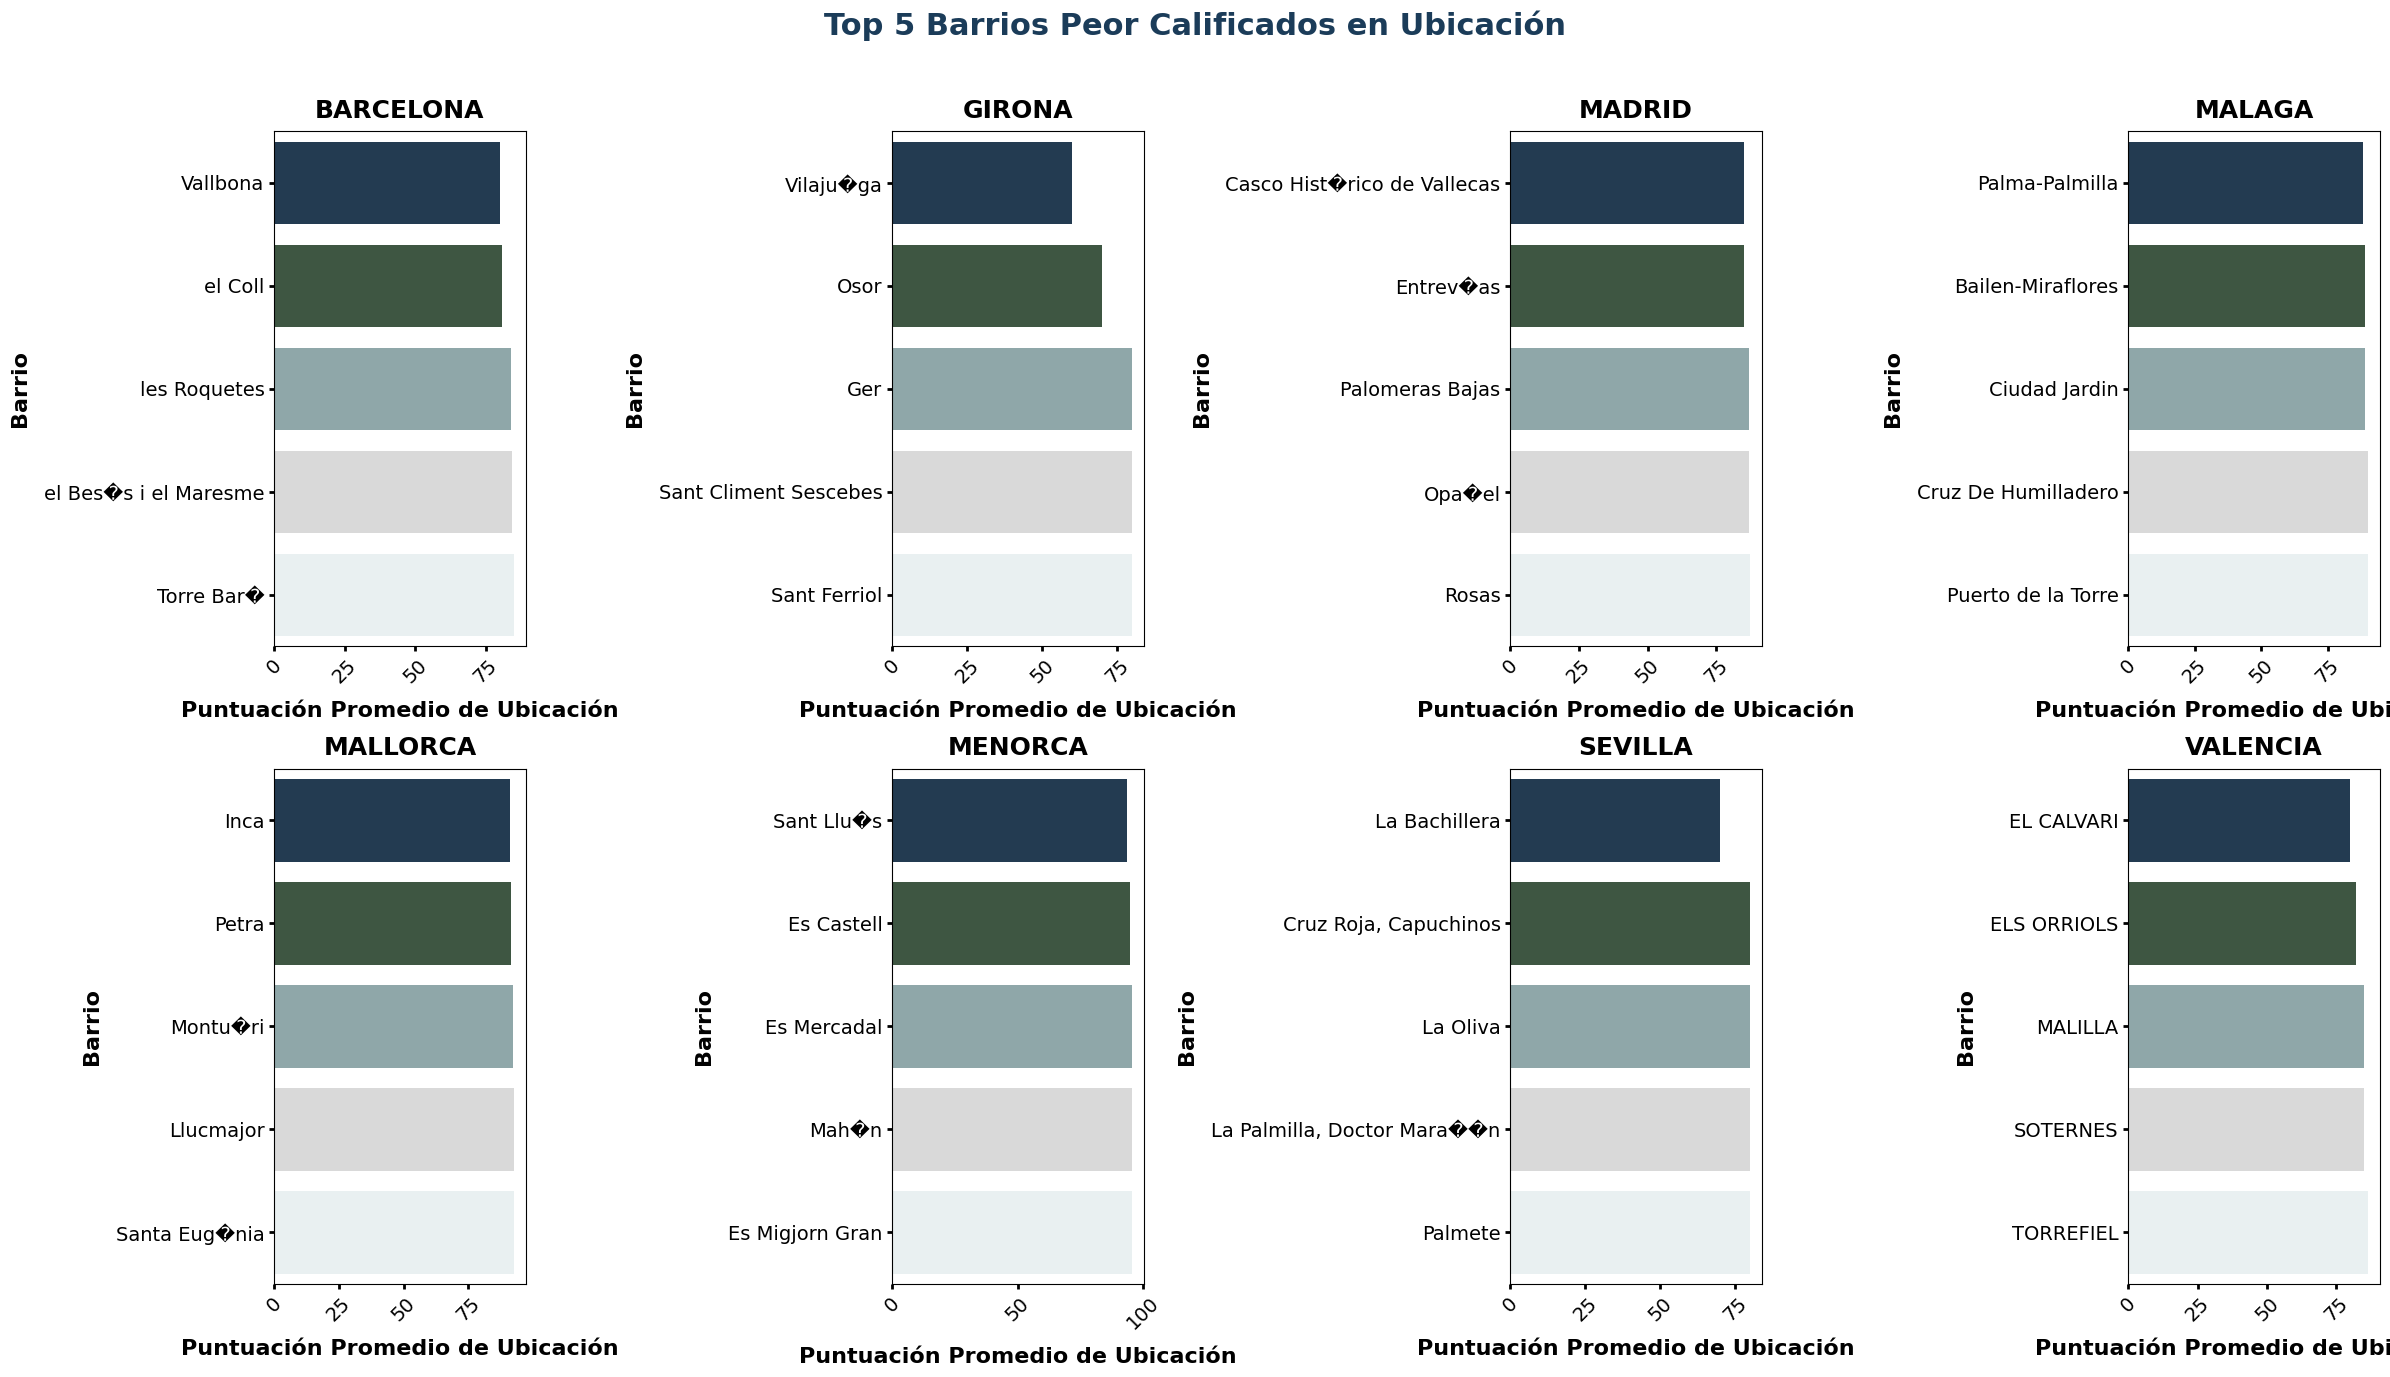

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Filtrar solo las columnas necesarias y eliminar valores nulos
df_filtered = df[["city", "neighbourhood_name", "review_scores_location", "review_scores_rating"]].dropna()

# 📌 Agrupar por ciudad y barrio, calculando la puntuación promedio
df_grouped = df_filtered.groupby(["city", "neighbourhood_name"]).agg(
    avg_review_scores_location=("review_scores_location", "mean"),
    avg_review_scores_rating=("review_scores_rating", "mean")
).reset_index()

# 📌 Obtener los **5 peores barrios** por ciudad en review_scores_location
worst_location = (
    df_grouped.groupby("city", group_keys=False)
    .apply(lambda x: x.nsmallest(5, "avg_review_scores_location"))  # Cambiado a 5 barrios
    .reset_index(drop=True)
)

# 📌 Obtener los **5 peores barrios** por ciudad en review_scores_rating
worst_rating = (
    df_grouped.groupby("city", group_keys=False)
    .apply(lambda x: x.nsmallest(5, "avg_review_scores_rating"))  # Cambiado a 5 barrios
    .reset_index(drop=True)
)

# 📌 Configurar el número de ciudades a mostrar por fila
num_cities = worst_location["city"].nunique()
cols = 4  # 4 ciudades por fila
rows = (num_cities // cols) + (num_cities % cols > 0)  # Determinar filas dinámicamente

# 📊 Gráfico para `review_scores_location`
fig, axes = plt.subplots(rows, cols, figsize=(24, rows * 7))
fig.suptitle("Top 5 Barrios Peor Calificados en Ubicación", fontsize=22, color=paleta[0], fontweight="bold")

for ax, (city, data) in zip(axes.flatten(), worst_location.groupby("city")):
    sns.barplot(data=data, x="avg_review_scores_location", y="neighbourhood_name", ax=ax, palette=paleta[:5])
    ax.set_title(city.upper(), color="black", fontweight="bold", fontsize=18, pad=10)
    ax.set_xlabel("Puntuación Promedio de Ubicación", color="black", fontweight="bold", fontsize=16, labelpad=10)
    ax.set_ylabel("Barrio", color="black", fontweight="bold", fontsize=16, labelpad=10)
    ax.tick_params(axis="x", labelsize=14, width=2, color="black", rotation=45)
    ax.tick_params(axis="y", labelsize=14, width=2, color="black")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

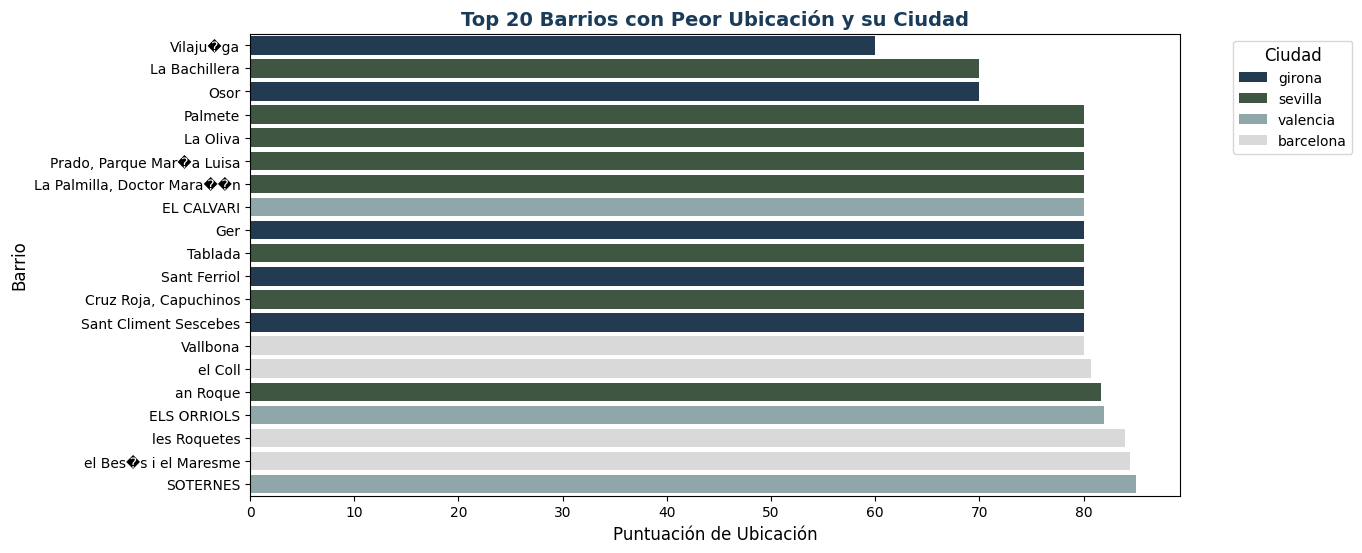

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar por puntuación de ubicación de menor a mayor
df_sorted = merged_table.sort_values(by="review_scores_location", ascending=True).head(20)  # Tomamos los 20 peores barrios

plt.figure(figsize=(12,6))

# Aplicar la paleta de colores corporativa
sns.barplot(data=df_sorted, x="review_scores_location", y="neighbourhood_name", hue="city", 
            palette=paleta[:len(df_sorted["city"].unique())])

# Configuración del gráfico
plt.xlabel("Puntuación de Ubicación", fontsize=12, color="black")
plt.ylabel("Barrio", fontsize=12, color="black")
plt.title("Top 20 Barrios con Peor Ubicación y su Ciudad", fontsize=14, fontweight="bold", color=paleta[0])
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.xticks(color="black")
plt.yticks(color="black")

# Mostrar el gráfico
plt.show()


# 🔹 Análisis de la Distribución
# 1️⃣ Las ciudades con más barrios en el ranking
# Girona (azul oscuro) y Sevilla (azul claro) tienen varios barrios con malas puntuaciones de ubicación.
# Barcelona (rojo claro) y Valencia (rojo oscuro) también aparecen, pero con menos frecuencia.

# 2️⃣ Barrios con peor puntuación de ubicación
# Vilajuïga (Girona) y Osor (Girona) tienen la puntuación de ubicación más baja.
# La Bachillera (Sevilla) y Tablada (Sevilla) también están entre las peores ubicaciones.
# Barrios como "el Besòs i el Maresme" (Barcelona) y "Sant Martí de Llémana" (Girona) tienen puntuaciones más altas dentro de la lista, pero siguen estando en el ranking de peor ubicación.

# 3️⃣ Rangos de Puntuación
# Algunos barrios tienen puntuaciones muy bajas (menores a 20), lo que indica problemas severos de ubicación.
# Otros barrios llegan hasta 70-80 puntos, lo que sugiere que, aunque están en el top de peores ubicaciones, siguen siendo moderadamente valorados.
# 📌 Conclusiones y Posibles Acciones
# 🔹 Girona y Sevilla tienen más barrios con mala ubicación, lo que sugiere que la percepción de la ubicación es más problemática en estas ciudades.
# 🔹 Los barrios con las peores puntuaciones podrían ser prioritarios para mejorar accesibilidad, transporte o señalización.
# 🔹 Podríamos cruzar este análisis con apartamento_mejorable para ver si estos barrios también tienen problemas en las propiedades.

Gráfico de dispersión: Relación entre review_scores_location y apartamento_mejorable<br>
Si hay una relación entre la mala ubicación y la cantidad de apartamentos problemáticos, este gráfico la mostrará.<br>
Si los barrios con peor ubicación tienen más apartamentos problemáticos, debería verse una tendencia.<br>

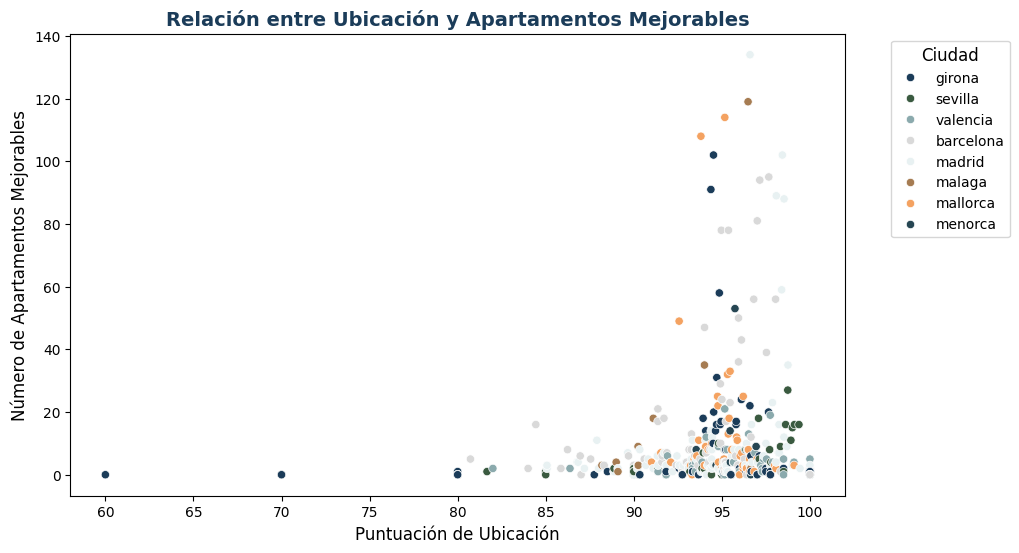

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Aplicar la paleta de colores corporativa
sns.scatterplot(data=merged_table, x="review_scores_location", y="apartamento_mejorable", 
                hue="city", palette=paleta[:len(merged_table["city"].unique())])

# Configuración del gráfico
plt.xlabel("Puntuación de Ubicación", fontsize=12, color="black")
plt.ylabel("Número de Apartamentos Mejorables", fontsize=12, color="black")
plt.title("Relación entre Ubicación y Apartamentos Mejorables", fontsize=14, fontweight="bold", color=paleta[0])
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.xticks(color="black")
plt.yticks(color="black")

# Mostrar el gráfico
plt.show()


# Análisis de la Distribución
# 1️⃣ Tendencia general:
# Los barrios con mejor puntuación de ubicación (95-100) tienden a tener más apartamentos mejorables.
# Los barrios con peor ubicación (60-75) tienen pocos apartamentos mejorables.
# Esto indica que una mala ubicación no siempre implica más problemas en los alojamientos, pero sí hay un grupo con buena ubicación que tiene muchos apartamentos problemáticos.

# 2️⃣ Ciudades con más puntos problemáticos:
# Barcelona (morado), Madrid (naranja) y Girona (rojo) tienen muchos puntos en la zona alta del eje Y, lo que indica que algunos de sus barrios tienen un alto número de apartamentos con baja puntuación relativa.
# Sevilla (azul oscuro), Valencia (verde) y Menorca (rosa) tienen menos puntos altos, lo que sugiere que no presentan tantos casos de apartamentos problemáticos.

# 3️⃣ Comportamiento de los barrios con peor ubicación:
# Hay muy pocos barrios con review_scores_location por debajo de 70, lo que sugiere que las ubicaciones extremadamente malas son poco comunes en el dataset.
# Estos barrios no presentan un número elevado de apartamentos mejorables, lo que puede significar que, aunque la ubicación sea mala, los alojamientos no están mal valorados en comparación con su entorno.

# 4️⃣ Zonas con mayor concentración de apartamentos problemáticos:
# Los puntos más altos del gráfico (más de 100 apartamentos mejorables) pertenecen a ciudades como Barcelona, Madrid y Mallorca.
# Esto sugiere que algunas zonas con muy buena ubicación pueden estar sobrevaloradas o con problemas específicos en los alojamientos.

# 📌 Conclusiones y Posibles Acciones
# ✅ No hay una relación directa entre mala ubicación y mayor cantidad de apartamentos problemables.
# ✅ Las ciudades con más problemas de apartamentos mejorables son Barcelona, Madrid y Mallorca.
# ✅ Se podría analizar en detalle por qué ciertos barrios con buena ubicación tienen tantas propiedades mal valoradas.


Boxplot para comparar review_scores_location por ciudad<br>
Este gráfico permite ver cómo varía la puntuación de ubicación en cada ciudad.<br>
Si una ciudad tiene barrios con muy mala ubicación, tendrá un boxplot extendido hacia abajo.<br>
Si una ciudad tiene puntuaciones consistentes, su caja será compacta.<br>

C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\684922256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_table, x="city", y="review_scores_location", palette="coolwarm")


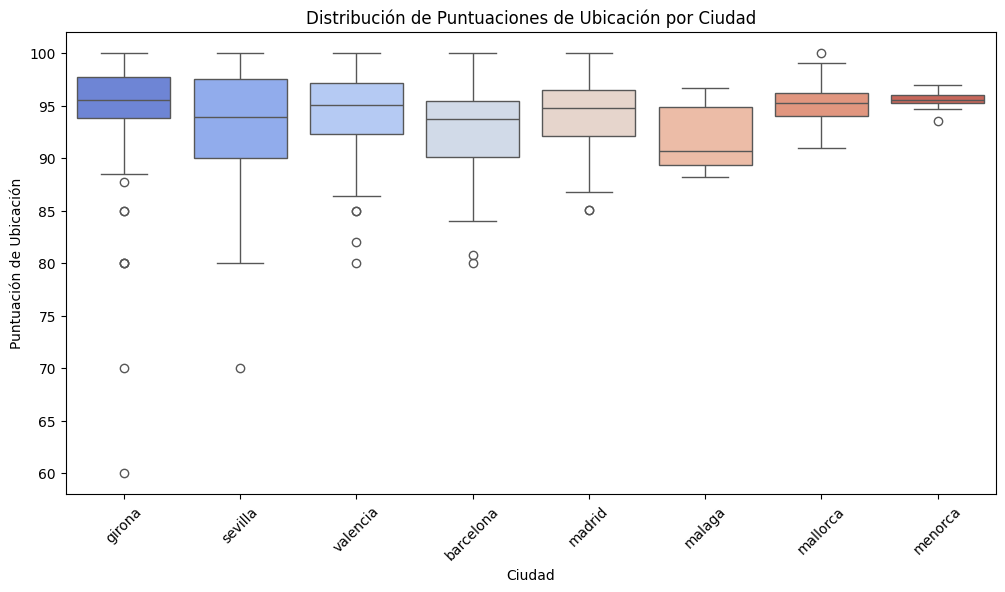

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_table, x="city", y="review_scores_location", palette="coolwarm")

# Configuración del gráfico
plt.xlabel("Ciudad")
plt.ylabel("Puntuación de Ubicación")
plt.title("Distribución de Puntuaciones de Ubicación por Ciudad")
plt.xticks(rotation=45)
plt.show()

# El gráfico es un boxplot que muestra la distribución de las puntuaciones de ubicación (review_scores_location) en distintas ciudades.

# 🔹 Análisis de la Distribución por Ciudad
# 1️⃣ Ciudades con mayor variabilidad en las puntuaciones
# Sevilla, Valencia y Barcelona tienen distribuciones amplias, lo que indica que algunos barrios están bien valorados mientras que otros tienen puntuaciones más bajas.
# Sevilla tiene la mayor dispersión, con valores desde 60 hasta casi 100, lo que sugiere que hay barrios con ubicaciones muy bien valoradas y otros con puntuaciones bastante malas.

# 2️⃣ Ciudades con menor variabilidad (ubicaciones más homogéneas)
# Menorca y Mallorca tienen cajas muy estrechas y medianas altas, lo que significa que la mayoría de sus barrios tienen ubicaciones similares y bien valoradas.
# Málaga y Madrid también muestran una distribución más compacta, aunque con algunas excepciones en los valores bajos.

# 3️⃣ Ciudades con barrios con las peores ubicaciones (outliers bajos)
# Girona, Sevilla y Valencia tienen barrios con puntuaciones de ubicación por debajo de 70, lo que indica que hay algunos barrios percibidos como desfavorables en términos de localización.
# Barcelona también tiene algunos barrios en torno a 80, pero en general sus puntuaciones se mantienen más altas.

# 4️⃣ Puntuaciones máximas y medianas
# La mediana en la mayoría de las ciudades está entre 95 y 100, lo que significa que la mayoría de los barrios están bien valorados en términos de ubicación.
# Menorca y Mallorca tienen las puntuaciones más altas de ubicación en general, con muy poca variabilidad.

# 📌 Conclusiones y Posibles Acciones
# ✅ Sevilla, Valencia y Barcelona tienen la mayor variabilidad en ubicación, lo que sugiere que algunos barrios necesitan mejoras en accesibilidad o servicios.
# ✅ Ciudades como Menorca y Mallorca tienen ubicaciones altamente valoradas y homogéneas, lo que indica menor riesgo en términos de percepción de ubicación.
# ✅ Sería interesante cruzar esta información con la cantidad de apartamentos mejorables para ver si las ciudades con mayor variabilidad en ubicación también tienen más problemas en sus alojamientos.




Gráfico de barras: Ciudades con más apartamentos problemáticos<br>
Este gráfico muestra qué ciudades tienen más apartamentos con baja puntuación relativa.<br>
Permite ver qué ciudades tienen más alojamientos en barrios problemáticos.<br>

C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\3630550359.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_table, x="city", y="apartamento_mejorable", palette="Blues_d", ci=None)
C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\3630550359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_table, x="city", y="apartamento_mejorable", palette="Blues_d", ci=None)


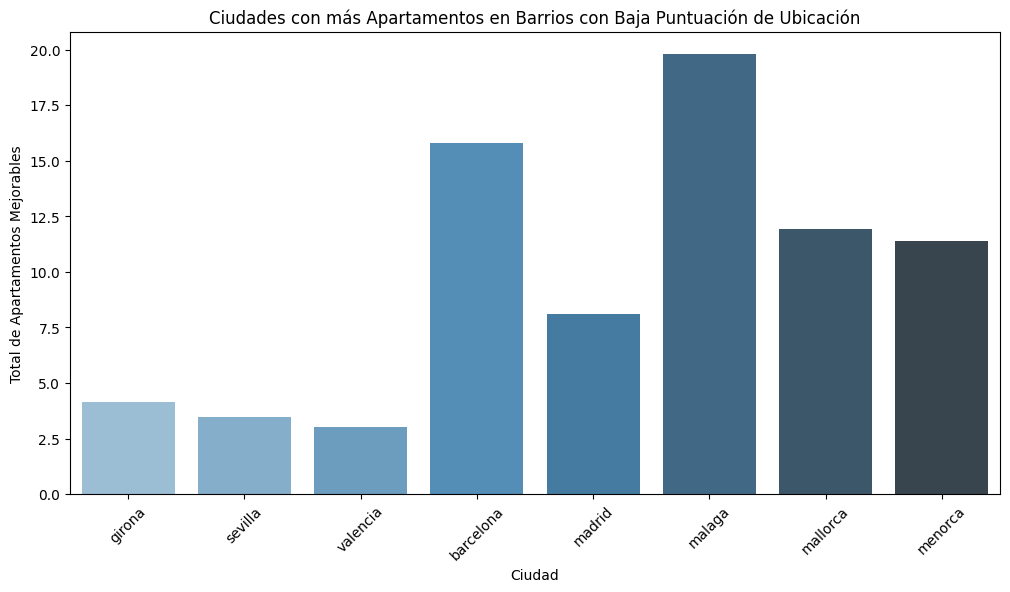

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(data=merged_table, x="city", y="apartamento_mejorable", palette="Blues_d", ci=None)

# Configuración del gráfico
plt.xlabel("Ciudad")
plt.ylabel("Total de Apartamentos Mejorables")
plt.title("Ciudades con más Apartamentos en Barrios con Baja Puntuación de Ubicación")
plt.xticks(rotation=45)
plt.show()

# 🔹 Análisis de la Distribución por Ciudad
# 1️⃣ Ciudades con más apartamentos problemáticos en barrios mal ubicados
# Málaga lidera con el mayor número de apartamentos mejorables, lo que sugiere que en sus barrios con baja puntuación de ubicación hay más alojamientos con valoración negativa.
# Barcelona y Mallorca también tienen una cantidad considerable de apartamentos problemáticos en barrios con mala ubicación.
# Menorca y Madrid están en un nivel intermedio, pero aún con un número considerable.

# 2️⃣ Ciudades con menos problemas
# Girona, Sevilla y Valencia tienen los valores más bajos, lo que indica que, aunque puedan tener barrios con mala ubicación, la cantidad de apartamentos mal valorados en estos barrios es menor.
# Esto podría significar que los alojamientos en esas ciudades están mejor adaptados a sus ubicaciones, o que hay menos barrios problemáticos en términos de ubicación.

# 3️⃣ Diferencias entre ciudades
# Málaga tiene una diferencia notable respecto al resto, lo que sugiere que la percepción de ubicación y la calidad de los apartamentos pueden ser más dispares en esa ciudad.
# Barcelona, a pesar de tener una mejor valoración de ubicación en general, tiene un número significativo de apartamentos mejorables en barrios problemáticos.

# 📌 Conclusiones y Posibles Acciones
# ✅ Málaga y Barcelona son las ciudades donde más alojamientos en barrios mal ubicados tienen problemas de valoración.
# ✅ Las ciudades con menos problemas en este aspecto son Girona, Sevilla y Valencia.
# ✅ Se podría profundizar en Málaga y Barcelona para entender qué factores contribuyen a esta combinación de mala ubicación y apartamentos problemáticos.
# ✅ También se podría analizar los precios en estas ciudades para ver si hay relación entre valoración y costos.


# 5to paso: Propuesta de negocio

Basándonos en los análisis realizados y la pregunta clave: "¿Qué ciudades y barrios muestran un potencial de optimización más grande considerando el número de reseñas y la puntuación de la zona?"<br>

Identificamos tres áreas clave de acción para mejorar la percepción y rendimiento de los alojamientos en barrios con baja valoración.<br>

1 Estrategia de Posicionamiento y Comunicación<br>
Ciudades objetivo:<br>
-Málaga, Barcelona y Mallorca son las ciudades con mayor número de apartamentos en barrios con mala ubicación.<br>
-Sevilla, Girona y Valencia presentan menor cantidad de apartamentos problemáticos en barrios con mala ubicación, lo que sugiere que no requieren tanta intervención.<br>

Acciones de marketing: <br>
-Redefinir la comunicación de los alojamientos en barrios con baja puntuación. <br>
-Enfocar los mensajes en aspectos positivos de la ubicación: conexiones de transporte, tranquilidad, proximidad a sitios locales únicos.<br>
-Usar contenido visual (videos, imágenes profesionales) para mejorar la percepción.<br>
-Fomentar reseñas positivas pidiendo feedback a huéspedes que hayan tenido experiencias favorables.<br>
-Segmentación del Público Objetivo: Si los barrios con mala ubicación tienen precios más bajos, se pueden orientar a viajeros con presupuesto ajustado. Promocionar los alojamientos como opciones para estadías largas o nómadas digitales, destacando beneficios como tranquilidad o costo reducido.<br>
-Colaboraciones con influencers y locales: Usar estrategias con influencers de viajes y gastronomía para cambiar la percepción de estos barrios y también Asociaciones con comercios locales para agregar descuentos o experiencias especiales en la zona.<br>


2 Estrategia de Mejoras en la Experiencia del Cliente.<br>
Problemática detectada:<br>
-Los barrios con peor ubicación no siempre tienen más alojamientos problemáticos.<br>
-Sin embargo, en ciudades como Málaga y Barcelona, hay una combinación de mala ubicación y problemas en los alojamientos, lo que impacta negativamente la experiencia del huésped.<br>

Acciones de marketing:<br>
-Optimización del producto en zonas problemáticas:<br>
    Incluir check-ins automatizados o transporte gratuito desde puntos clave para reducir la percepción de mala ubicación.<br>
    Mejorar las fotos y descripciones para alinear expectativas con la realidad.<br>
    Añadir detalles diferenciadores: recomendaciones locales, guías de barrio, eventos especiales.<br>
-Campañas de fidelización en zonas problemáticas: Crear ofertas para huéspedes recurrentes que hayan valorado positivamente otros alojamientos de la misma cadena o gestor y Promover paquetes con experiencias locales (gastronomía, cultura, movilidad).<br>

3 Estrategia de Pricing y Diferenciación<br>
Problema detectado:<br>
-Hay barrios con buena ubicación pero con muchos apartamentos mal valorados, lo que sugiere un desajuste entre precio, calidad y expectativas del huésped.<br>
-Es posible que algunos alojamientos estén sobrevalorados para la experiencia que ofrecen.<br>

Acciones de marketing:<br>
-Ajuste de precios basado en reputación y ubicación: Utilizar modelos de pricing dinámico considerando la puntuación de la ubicación y la calidad del alojamiento.<br>
-Ofertas exclusivas en barrios con mala reputación para incentivar la ocupación.<br>
-Diferenciación de la oferta en barrios problemáticos: Crear categorías dentro de la plataforma: “Mejor relación calidad-precio”, “Mejor ubicación para explorar” e implementar garantías de satisfacción o políticas de reembolso flexibles en estos barrios.<br>


Conclusión: ¿Qué barrios tienen más potencial de optimización?<br>
Los barrios en Málaga, Barcelona y Mallorca presentan la mayor oportunidad de optimización debido a la combinación de mala ubicación percibida y alto número de apartamentos con puntuaciones bajas.<br>

Los esfuerzos de marketing deben enfocarse en:<br>
-Mejorar la percepción de la ubicación con estrategias de comunicación.<br>
-Optimizar la experiencia del huésped con servicios adicionales.<br>
-Ajustar precios y diferenciar la oferta según las necesidades del cliente.<br>

